<a href="https://colab.research.google.com/github/kevirui/prevision-de-atrasos-de-vuelos/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis estadistico y categorico

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/kevirui/prevision-de-atrasos-de-vuelos/refs/heads/main/flights.csv"

data = pd.read_csv(url)

data.shape

(71175, 11)

In [2]:
data.head(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
data.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [5]:
data.describe(include="O")

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


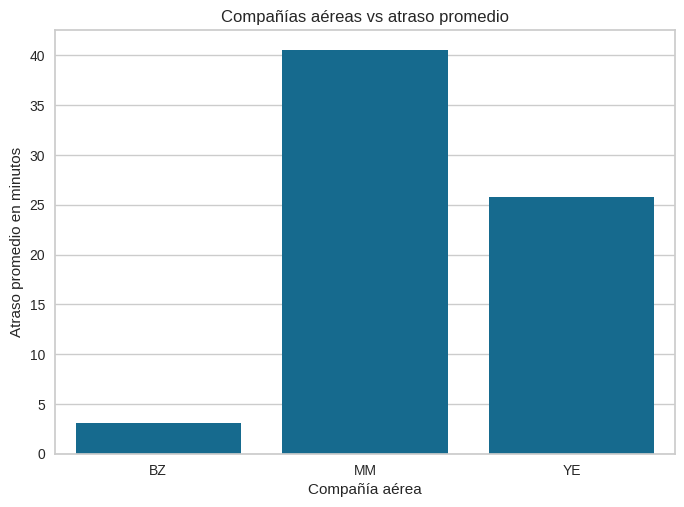

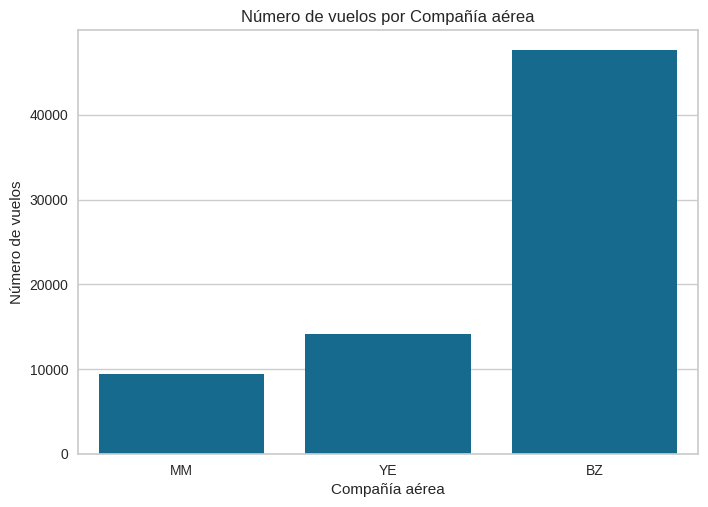

In [6]:
avg_delay = data.groupby('airline')['delay'].mean().reset_index()

sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=data, x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')

plt.show()

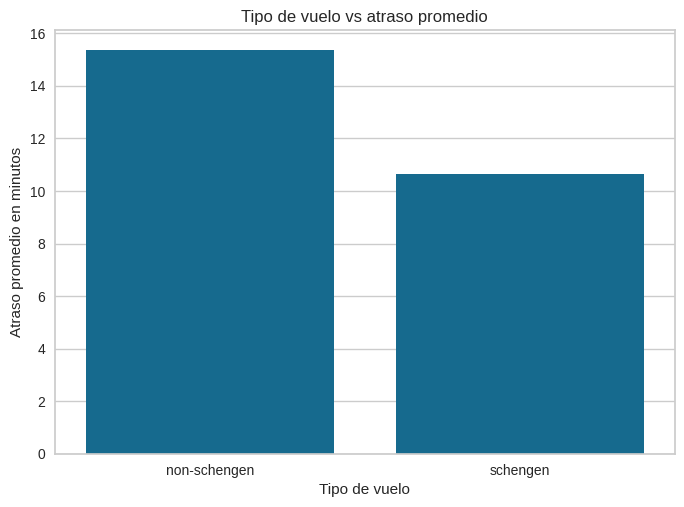

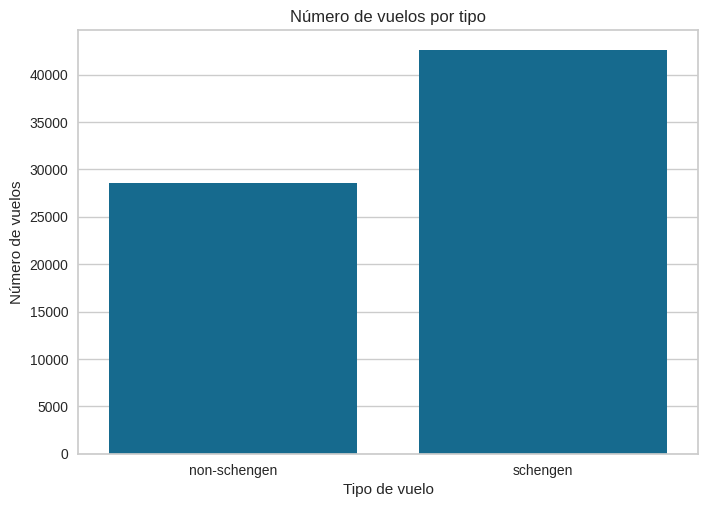

In [7]:
avg_delay = data.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x='schengen', y='delay', data=avg_delay)

plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=data, x='schengen')
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

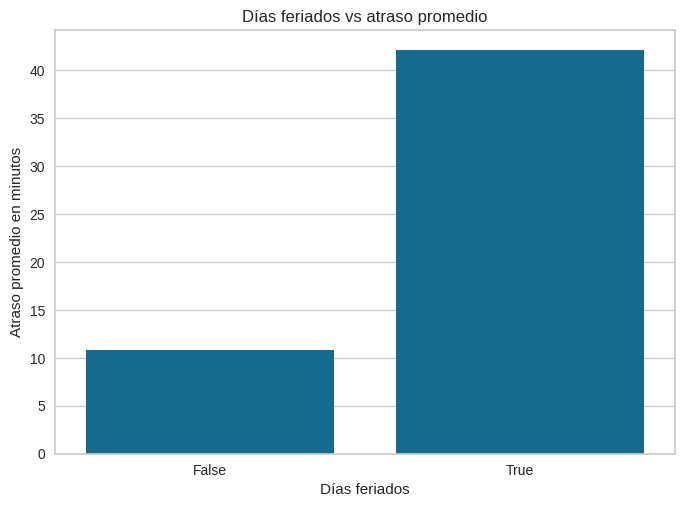

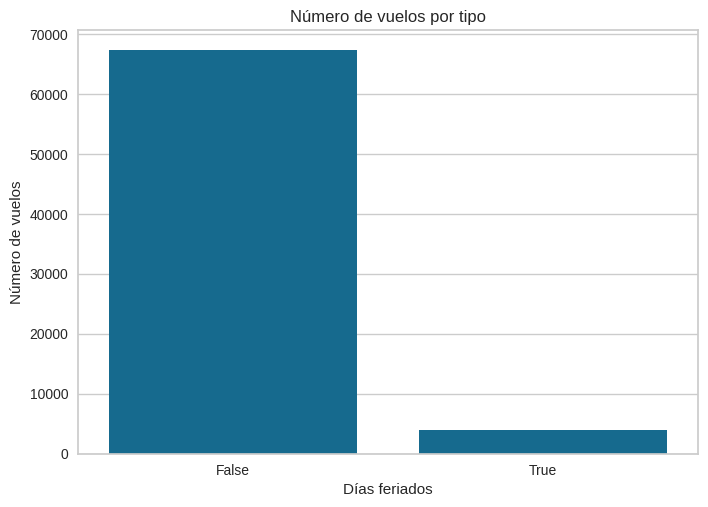

In [8]:
avg_delay = data.groupby('is_holiday')['delay'].mean().reset_index()

sns.barplot(x='is_holiday', y='delay', data=avg_delay)

plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=data, x='is_holiday')
plt.title('Número de vuelos por tipo')
plt.xlabel('Días feriados')
plt.ylabel('Número de vuelos')
plt.show()

In [9]:
data['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

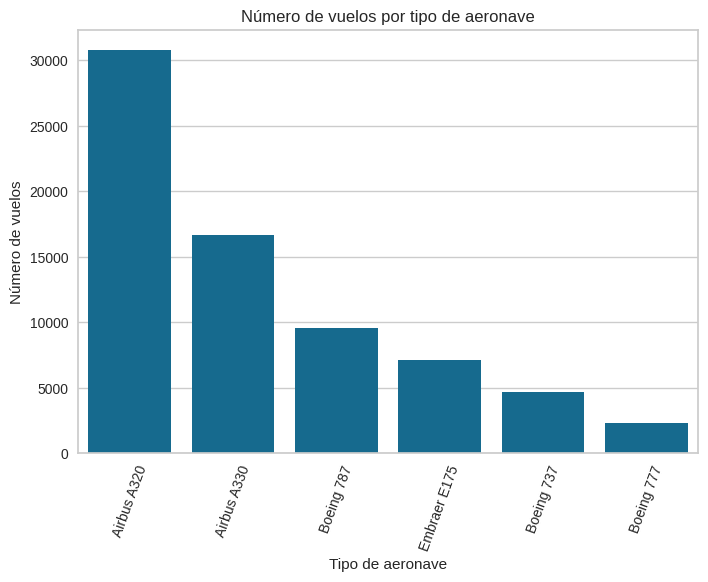

In [10]:
order = data['aircraft_type'].value_counts().index

sns.countplot(data=data, x='aircraft_type', order=order)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

Text(0.5, 1.0, 'Distribución de las horas de llegada')

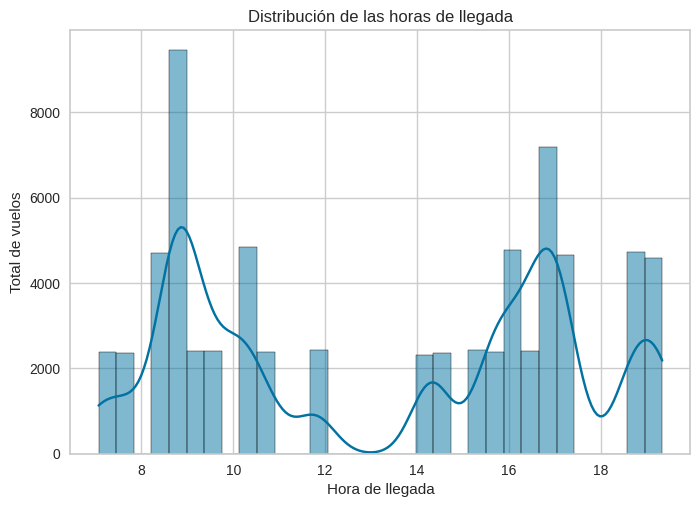

In [11]:
sns.histplot(data=data, x="arrival_time", kde=True)
plt.xlabel("Hora de llegada")
plt.ylabel("Total de vuelos")
plt.title("Distribución de las horas de llegada")

# Función Freedman - Diaconis Rule

In [12]:
def ancho_bin(df, column):
  q75, q25 = np.percentile(df[column], [75, 25])
  iqr = q75 - q25
  return 2 * iqr * np.power(len(df[column]), -1/3)

Text(0.5, 1.0, 'Distribución de las horas de llegada')

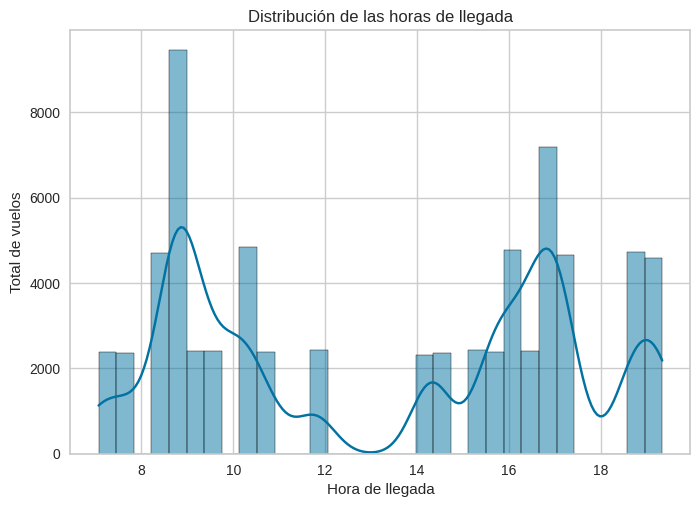

In [13]:
binwidth = ancho_bin(data, 'arrival_time')
sns.histplot(data=data, x="arrival_time", kde=True, binwidth=binwidth)
plt.xlabel("Hora de llegada")
plt.ylabel("Total de vuelos")
plt.title("Distribución de las horas de llegada")

Text(0.5, 1.0, 'Distribución de las horas de salida')

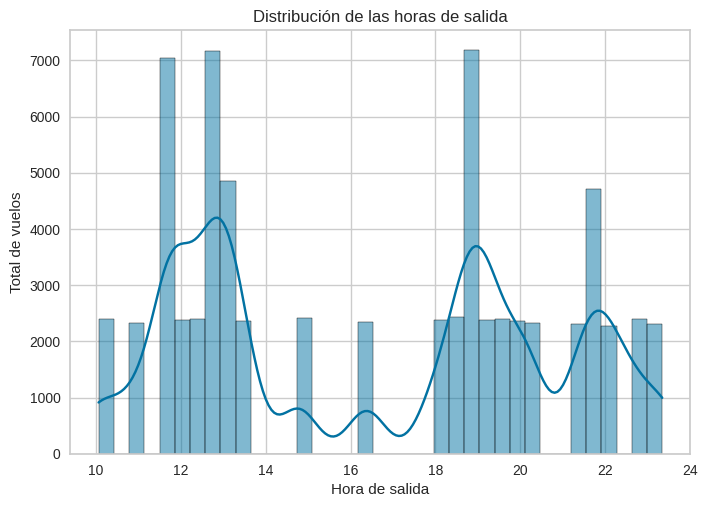

In [14]:
binwidth = ancho_bin(data, 'departure_time')
sns.histplot(data=data, x="departure_time", kde=True, binwidth=binwidth)
plt.xlabel("Hora de salida")
plt.ylabel("Total de vuelos")
plt.title("Distribución de las horas de salida")

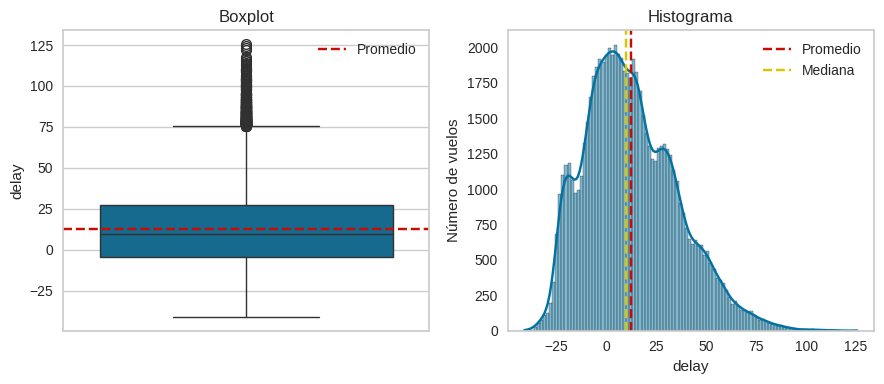

In [15]:
atraso_promedio = data['delay'].mean()
atraso_mediana = data['delay'].median()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=data, y="delay", ax=ax[0])
ax[0].set_title("Boxplot")
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label="Promedio")
ax[0].legend()

binwidth = ancho_bin(data, 'delay')
sns.histplot(data=data, x="delay", ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel("Número de vuelos")
plt.grid(False)
ax[1].set_title("Histograma")
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label="Promedio")
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label="Mediana")
ax[1].legend()

plt.tight_layout()

plt.show()

# Clase 2

In [16]:
data.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [17]:
data['date'] = data['year'].astype(str) + "-" + (data['day'] + 1).astype(str).str.zfill(3)
data['date'] = pd.to_datetime(data['date'], format="%Y-%j")
data.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [18]:
data['is_weekend'] = data['date'].dt.weekday.isin([5, 6])
data['day_name'] = data['date'].dt.day_name()
data.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
8229,2,BZ,Airbus A320,schengen,ZQO,19.196804,22.196804,183,2011,False,13.616221,2011-07-03,True,Sunday
47216,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,227,2018,False,6.214900,2018-08-16,False,Thursday
23776,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,125,2014,False,5.949911,2014-05-06,False,Tuesday
45023,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,81,2018,False,-1.251238,2018-03-23,False,Friday
37308,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,297,2016,False,-21.526133,2016-10-24,False,Monday


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

## Advertencias

In [20]:
import warnings

warnings.filterwarnings('ignore')

## Transformación de variables


In [21]:
data['schengen'] = data['schengen'].replace({'non-schengen':0, 'schengen':1})
data['is_holiday'] = data['is_holiday'].replace({False:0, True:1})
data['is_weekend'] = data['is_weekend'].replace({False:0, True:1})
data.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
19378,11,BZ,Airbus A320,0,EMM,10.177197,13.177197,196,2013,0,14.379626,2013-07-16,0,Tuesday
17414,12,YE,Airbus A330,1,TZF,17.313731,21.313731,65,2013,0,22.446364,2013-03-07,0,Thursday
47483,9,BZ,Airbus A330,0,TZF,10.733469,12.733469,245,2018,0,11.805617,2018-09-03,0,Monday


In [22]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

pd.get_dummies(data=data, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
datos_codificados = pd.get_dummies(data=data, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
32164,11,0,10.177197,13.177197,319,2015,0,-8.595648,2015-11-16,0,...,0,0,0,0,1,0,0,0,0,0
47681,5,1,9.344097,12.344097,258,2018,0,22.554720,2018-09-16,1,...,0,0,1,0,0,0,1,0,0,0
41251,5,1,9.344097,12.344097,195,2017,0,33.009858,2017-07-15,1,...,0,0,1,0,0,1,0,0,0,0
69861,14,1,7.708301,11.708301,277,2022,0,-18.171352,2022-10-05,0,...,0,0,1,0,0,0,0,0,0,1
704,13,0,10.172731,13.172731,46,2010,0,-19.654431,2010-02-16,0,...,1,0,0,0,0,0,0,0,1,0


In [24]:
data[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [25]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [26]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time', 'day', 'year', 'date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
60083,0,16.571894,0,-7.748977,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
19438,1,7.065594,0,13.531673,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13003,1,8.923441,0,-5.127591,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40326,0,16.718722,0,15.614866,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3070,0,10.733469,0,-21.938912,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
32825,1,9.668655,0,28.940589,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
60,0,10.177197,0,-1.304695,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8225,1,7.708301,0,-17.269922,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1634,0,10.733469,0,-17.323423,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
14022,0,10.172731,0,-23.808670,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(data)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7,1,8.564949,13.564949,364,2022,1,56.16708,2022-12-31,1
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1


# Clase 3

In [30]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

x = df.drop(columns=['delay'])
y = df['delay']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

baseline = DummyRegressor(strategy='mean')
baseline.fit(x_train, y_train)

DummyRegressor()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(x_test)

def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {
      'RMSE': round(rmse**(1/2), 4),
      'MAE': round(mae, 4),
      'R2': round(r2, 4)
  }
  return metricas

  from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(x_train, y_train)

    y_pred_dummy = model_dummy.predict(x_test)

    metricas = calcular_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
RMSE: 23.2124
MAE: 18.625
R2: -0.0001


Estrategia: median
RMSE: 23.4093
MAE: 18.5151
R2: -0.0171


Estrategia: quantile
RMSE: 28.8715
MAE: 22.1284
R2: -0.5472


Estrategia: constant
RMSE: 23.3724
MAE: 18.5142
R2: -0.0139




In [40]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.2124, 'MAE': 18.625, 'R2': -0.0001}

In [42]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42)
modelo.fit(x_train, y_train)
ypred = modelo.predict(x_test)

resultados_rf = calcular_regresion(y_test, ypred)
resultados_rf

{'RMSE': 13.7977, 'MAE': 11.0595, 'R2': 0.6466}

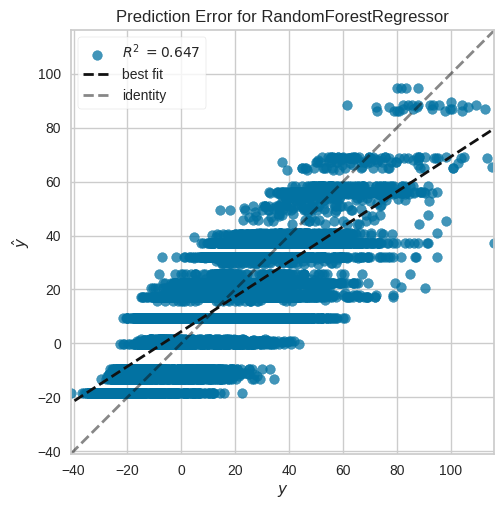

In [43]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, x_train, y_train, x_test, y_test);

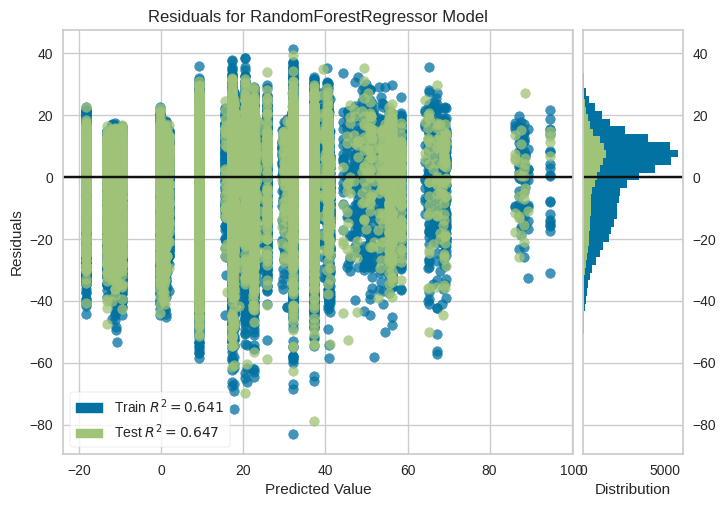

In [46]:
from yellowbrick.regressor import residuals_plot

visualizer = residuals_plot(modelo, x_train, y_train, x_test, y_test);

In [50]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    "RMSE": "neg_root_mean_squared_error",
    "MAE": "neg_mean_absolute_error",
    "R2": "r2"
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, x_train, y_train, cv=cv, scoring=scoring)

In [51]:
def imprimirResultadosTupla(cv_results):
  for metrica, valores in cv_results.items():
    print(f"{metrica}: {round(valores.mean(), 4)}")

In [52]:
imprimirResultadosTupla(cv_results)

fit_time: 2.9097
score_time: 0.0623
test_RMSE: -13.8628
test_MAE: -11.1287
test_R2: 0.6399
